# Get the data

the images we're working with are from 101food data set and we have modified it for only pizza and steak CV
https://www.kaggle.com/datasets/dansbecker/food-101

In [ ]:
import zipfile
# !wget is for getting the data in the link and uploading it into google colab not using youe internet
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2024-04-26 15:17:05--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.145.207, 74.125.128.207, 74.125.143.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.145.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  33.6MB/s    in 3.1s    

2024-04-26 15:17:08 (33.6 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
# Unzip the downaloded file

zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")

zip_ref.extractall()
zip_ref.close()

## Inspect the data (Become one with it)

A very crutial step at the beginning of any machine learning project is becoming one with the data

And for a computer cisioin project... this Ususally vizualizing many samples of your data

In [ ]:
!ls pizza_steak/

test  train


In [ ]:
!ls pizza_steak/trian

ls: cannot access 'pizza_steak/trian': No such file or directory


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [ ]:
import os

# os.walk for taking a walk through the pizza_steal directory and list number of files

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f'there are {len(dirnames)} directories and {len(filenames)}, images in {dirpath}')

there are 2 directories and 0, images in pizza_steak
there are 2 directories and 0, images in pizza_steak/test
there are 0 directories and 250, images in pizza_steak/test/steak
there are 0 directories and 250, images in pizza_steak/test/pizza
there are 2 directories and 0, images in pizza_steak/train
there are 0 directories and 750, images in pizza_steak/train/steak
there are 0 directories and 750, images in pizza_steak/train/pizza


In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Apr 26 06:20 .
drwxr-xr-x 1 root root 4096 Apr 26 06:20 ..
drwxr-xr-x 4 root root 4096 Apr 26 06:20 test
drwxr-xr-x 4 root root 4096 Apr 26 06:20 train


In [ ]:
# another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To Vizsualize our images, first let's get the class names programmatically.

In [ ]:
# Get the classnames programatically

import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of calss_names from the dsubdirectories

print(class_names)

['pizza' 'steak']


In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):

    # Setup the target directory (We'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"image_shape: {img.shape}") # shows the shape if the image

  return img

['2574896.jpg']
image_shape: (289, 512, 3)


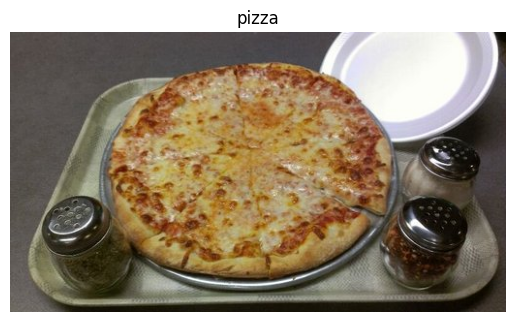

In [ ]:
#view_random_image from the training dataset
img = view_random_image(target_dir=  "pizza_steak/train/",
                        target_class = "pizza")

In [ ]:
img.dtype

dtype('uint8')

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(289, 512, 3), dtype=uint8, numpy=
array([[[ 76,  73,  68],
        [ 78,  75,  70],
        [ 80,  77,  72],
        ...,
        [  9,   8,   3],
        [  8,   9,   3],
        [  8,   9,   3]],

       [[ 79,  76,  71],
        [ 80,  77,  72],
        [ 83,  80,  75],
        ...,
        [  7,   6,   1],
        [  6,   7,   1],
        [  5,   6,   0]],

       [[ 79,  76,  71],
        [ 81,  78,  73],
        [ 83,  80,  75],
        ...,
        [  6,   5,   0],
        [  5,   5,   0],
        [  4,   4,   0]],

       ...,

       [[111, 107,  98],
        [111, 107,  98],
        [112, 108,  99],
        ...,
        [ 66,  57,  48],
        [ 67,  58,  51],
        [ 69,  60,  53]],

       [[109, 105,  96],
        [110, 106,  97],
        [111, 107,  98],
        ...,
        [ 69,  59,  50],
        [ 71,  60,  54],
        [ 71,  60,  54]],

       [[105, 102,  95],
        [ 98,  95,  88],
        [104, 101,  94],
        ...,
        [ 71,  58,  5

In [ ]:
# View the image shape
img.shape # Returns width, height, colour channels

(289, 512, 3)

In [ ]:
# Get all the pixle values between 0 and 1
img/255.

array([[[0.29803922, 0.28627451, 0.26666667],
        [0.30588235, 0.29411765, 0.2745098 ],
        [0.31372549, 0.30196078, 0.28235294],
        ...,
        [0.03529412, 0.03137255, 0.01176471],
        [0.03137255, 0.03529412, 0.01176471],
        [0.03137255, 0.03529412, 0.01176471]],

       [[0.30980392, 0.29803922, 0.27843137],
        [0.31372549, 0.30196078, 0.28235294],
        [0.3254902 , 0.31372549, 0.29411765],
        ...,
        [0.02745098, 0.02352941, 0.00392157],
        [0.02352941, 0.02745098, 0.00392157],
        [0.01960784, 0.02352941, 0.        ]],

       [[0.30980392, 0.29803922, 0.27843137],
        [0.31764706, 0.30588235, 0.28627451],
        [0.3254902 , 0.31372549, 0.29411765],
        ...,
        [0.02352941, 0.01960784, 0.        ],
        [0.01960784, 0.01960784, 0.        ],
        [0.01568627, 0.01568627, 0.        ]],

       ...,

       [[0.43529412, 0.41960784, 0.38431373],
        [0.43529412, 0.41960784, 0.38431373],
        [0.43921569, 0

## An end-to-end example of CNN
+ Load our images
+ Preprocessing our images
+ Build a CNN to find pattens in our images
+ Compile our CNN
+ Fot the CNN to our training data

In [ ]:
class myCallbacks(tf.keras.callbacks.Callback):
  def on_epoch_training_off(self, epochs, logs= {}):
    if(logs.get("accuracy") >= 0.99):
      print("Target_reached")
      self.model.stop_training = True
callback = myCallbacks()

NameError: name 'tf' is not defined

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set a random seed
tf.random.set_seed(42)

# Preprocess the data( Normalize the value tensors)
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Set path to the data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import the data from the directories
train_data = train_datagen.flow_from_directory(
    directory = train_dir,
    batch_size = 32,
    target_size = (224, 224),
    class_mode = "binary",
    seed = 42
)

valid_data = valid_datagen.flow_from_directory(
    directory = test_dir,
    batch_size = 32,
    target_size = (224, 224),
    class_mode = "binary",
    seed=42
)


# build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 16,
                           kernel_size= 3, # (3, 3)
                           activation = "relu",
                           input_shape = (224, 224, 3)),

    tf.keras.layers.Conv2D(32 ,3, activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding= "valid"),

    tf.keras.layers.Conv2D(64, 3, activation= "relu"),
    tf.keras.layers.Conv2D(64, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# Compile the model
model_1.compile(loss = "binary_crossentropy",
                optimizer  = tf.keras.optimizers.Adam(),
                metrics = "accuracy")

# Fit the data onto the model
history_1 = model_1.fit(train_data,
                        epochs = 3,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data),
                        callbacks = [callback])

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/3
47/47 [==============================] - 24s 326ms/step - loss: 0.6015 - accuracy: 0.6687 - val_loss: 0.4376 - val_accuracy: 0.8080
Epoch 2/3
47/47 [==============================] - 11s 241ms/step - loss: 0.4654 - accuracy: 0.7880 - val_loss: 0.3947 - val_accuracy: 0.8380
Epoch 3/3
47/47 [==============================] - 6s 135ms/step - loss: 0.4144 - accuracy: 0.8100 - val_loss: 0.4163 - val_accuracy: 0.8280


In [ ]:
len(train_data), 1500/ 32

(47, 46.875)

In [ ]:
# Get a model Summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      4640      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 64)        0         
 g2D)                                                   

# using the same model as before
Let's replicate the model we've built in a previous section to see if it works with our image data.

The model we're building is from tensorflow dataground

In [ ]:
train_data

In [ ]:
# Set a random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 7s 119ms/step - loss: 0.8986 - accuracy: 0.5027 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 6s 123ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 110ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 6s 124ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 109ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_2.evaluate(valid_data)

16/16 [==============================] - 1s 80ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6931548118591309, 0.5]

In [ ]:
def analyzer(model, train_generator):
    """
    With this function, you'll upload as many images as you want and will check your models with the uploaded images.
    """
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    from google.colab import files
    from keras.preprocessing import image
    import tensorflow as tf

    a, b = tuple(train_generator.class_indices.keys())  # Corrected this line

    uploaded = files.upload()

    for fn in uploaded.keys():
        path = fn
        plt.imshow(mpimg.imread(path))
        img = image.load_img(path, target_size=(224, 224))
        tensored_image = image.img_to_array(img)
        tensored_image = tf.expand_dims(tensored_image, axis=0)  # Specify axis

        classes = model.predict(tensored_image)
        print(classes)
        print(classes[0])
        if classes[0] > 0.5:  # No need for parentheses here
            print(b)
        else:
            print(a)


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Set a random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 7s 124ms/step - loss: 3.1335 - accuracy: 0.6220 - val_loss: 2.2516 - val_accuracy: 0.5740
Epoch 2/5
47/47 [==============================] - 6s 117ms/step - loss: 1.2775 - accuracy: 0.6767 - val_loss: 0.7265 - val_accuracy: 0.6540
Epoch 3/5
47/47 [==============================] - 6s 137ms/step - loss: 0.5555 - accuracy: 0.7393 - val_loss: 0.4497 - val_accuracy: 0.7780
Epoch 4/5
47/47 [==============================] - 5s 110ms/step - loss: 0.5132 - accuracy: 0.7780 - val_loss: 0.7260 - val_accuracy: 0.6440
Epoch 5/5
47/47 [==============================] - 5s 116ms/step - loss: 0.5419 - accuracy: 0.7853 - val_loss: 0.5483 - val_accuracy: 0.7320


In [ ]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Visualize the data

['3777020.jpg']
image_shape: (512, 512, 3)
['517902.jpg']
image_shape: (341, 512, 3)


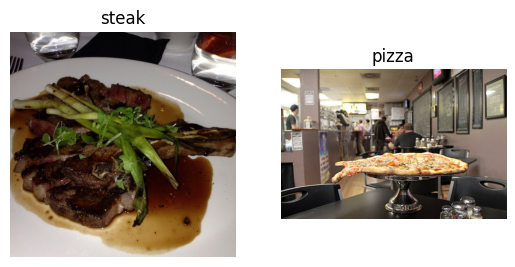

In [ ]:
# Visualize the data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

pizza_img = view_random_image

### 2. Prepeocces the data(prepare the data for the model)

In [ ]:
# Define directory dataset path
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [ ]:
# Create train and test data generator and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Load in our image data from directories
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224), # Hight and width
    batch_size = 32, # Number of batches(size of minibatches to load data innit)
    class_mode = "binary"
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = "binary"
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a train data batch
images, labels = train_data.next() # get the next batch of images/labels in data
len(images), len(labels) # len(labels) == batch_size

(32, 32)

In [ ]:
# how many batches are there?
len(train_data)
# sinze 1500/32

47

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.03137255, 0.02745098, 0.04705883],
          [0.02745098, 0.02352941, 0.04313726],
          [0.03921569, 0.03921569, 0.04705883],
          ...,
          [0.01960784, 0.01960784, 0.05882353],
          [0.04313726, 0.05882353, 0.09411766],
          [0.01568628, 0.04313726, 0.08235294]],
 
         [[0.01568628, 0.01176471, 0.03137255],
          [0.01568628, 0.01176471, 0.03137255],
          [0.01568628, 0.01176471, 0.03137255],
          ...,
          [0.02352941, 0.02352941, 0.05490196],
          [0.04313726, 0.05490196, 0.09019608],
          [0.02745098, 0.04313726, 0.07843138]],
 
         [[0.        , 0.        , 0.01568628],
          [0.        , 0.        , 0.01568628],
          [0.00392157, 0.        , 0.01960784],
          ...,
          [0.01568628, 0.01176471, 0.04313726],
          [0.01568628, 0.01568628, 0.04705883],
          [0.        , 0.00784314, 0.04313726]],
 
         ...,
 
         [[0.2784314 , 0.28627452, 0.23529413],
          [0.21960

In [ ]:
images[7].shape

(224, 224, 3)

In [ ]:
# view the first batch of labels
labels

array([0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

### Create a CNN model (start with baseLINE)

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Let's create the model (baselins = 3layer CNN)
model_4 = Sequential([
    Conv2D(filters = 10,
           kernel_size = 3,
           strides = 1, # Moving 1 pixle at a time in filter
           padding = "valid", # If same =  no boarder if valid = boarder (1, 1)
           activation = "relu",
           input_shape = (224, 224, 3)),# Input layer
    Conv2D(10, 3, activation = "relu"),
    Conv2D(10, 3, activation = "relu"),

    Flatten(),
    Dense(1, activation = "sigmoid") # Output layer working with binary classification so only 1 output neuron

])

In [ ]:
#  Compile the model
model_4.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

In [ ]:
model_4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_19 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_20 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_6 (Flatten)         (None, 475240)            0         
                                                                 
 dense_6 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Fit the model
history_4 =  model_4.fit(train_data,
                         epochs = 5,
                         steps_per_epoch = len(train_data),
                         validation_data = test_data,
                         validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 19s 331ms/step - loss: 0.9540 - accuracy: 0.6007 - val_loss: 0.5824 - val_accuracy: 0.6940
Epoch 2/5
47/47 [==============================] - 7s 138ms/step - loss: 0.4989 - accuracy: 0.7687 - val_loss: 0.4295 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 8s 162ms/step - loss: 0.3526 - accuracy: 0.8587 - val_loss: 0.4155 - val_accuracy: 0.8140
Epoch 4/5
47/47 [==============================] - 5s 115ms/step - loss: 0.1546 - accuracy: 0.9527 - val_loss: 0.4787 - val_accuracy: 0.8220
Epoch 5/5
47/47 [==============================] - 7s 160ms/step - loss: 0.0507 - accuracy: 0.9927 - val_loss: 0.6141 - val_accuracy: 0.7840


###  Evaluating the model

<Axes: >

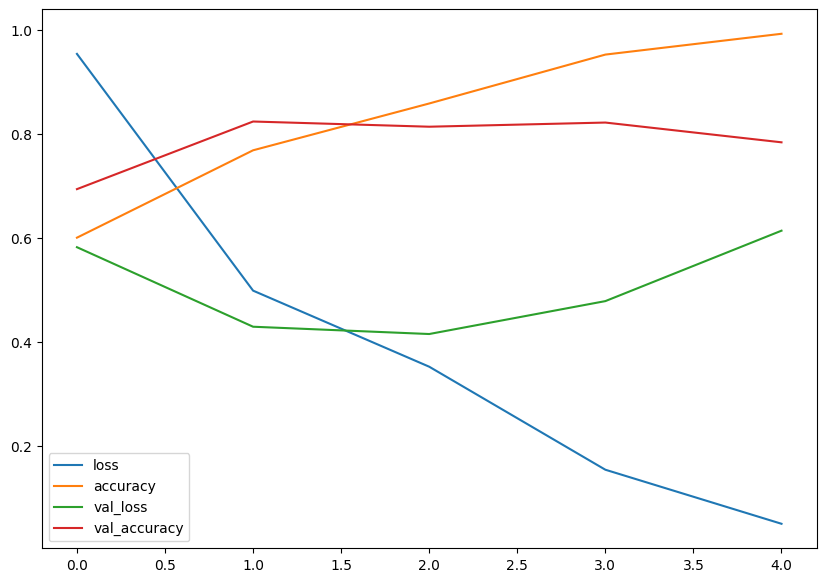

In [ ]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize = (10 ,7))

In [ ]:
# Plot the validation and training curves seperately

def plot_loss_curves(history):
  """
  Returnes separate loss curves for training and validation metrics.
  """
  import matplotlib.pyplot as plt
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  # plot loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot the accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = "accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

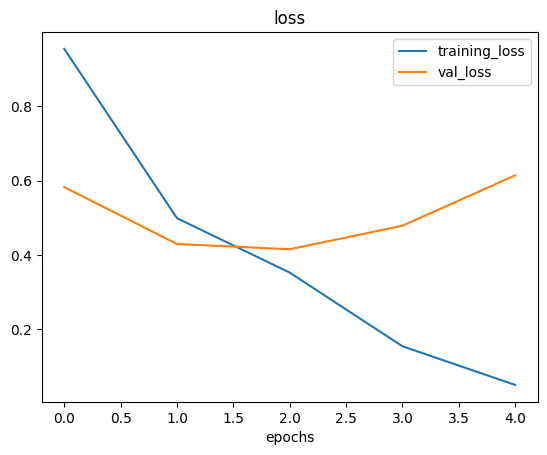

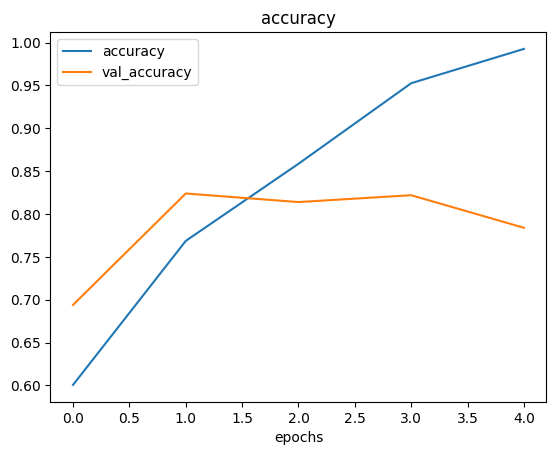

In [ ]:
plot_loss_curves(history_4)

### 6. Adjust the model parameters


Fitting a machine learning model comes in 3 steps
0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting



In [ ]:
# Create the model
model_5 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape =(224, 224, 3)),
    MaxPool2D(2, 2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(2, 2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(2, 2),
    Flatten(),
    Dense(1, activation = "sigmoid")

])

In [ ]:
# compile the model
model_5.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                      validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 155ms/step - loss: 0.6370 - accuracy: 0.6487 - val_loss: 0.5284 - val_accuracy: 0.7420
Epoch 2/5
47/47 [==============================] - 5s 112ms/step - loss: 0.5159 - accuracy: 0.7653 - val_loss: 0.4102 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 6s 128ms/step - loss: 0.4262 - accuracy: 0.8147 - val_loss: 0.3614 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 6s 130ms/step - loss: 0.3958 - accuracy: 0.8180 - val_loss: 0.3457 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 5s 113ms/step - loss: 0.3726 - accuracy: 0.8340 - val_loss: 0.3205 - val_accuracy: 0.8540


In [ ]:
# Get a summary of out model with maxpooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


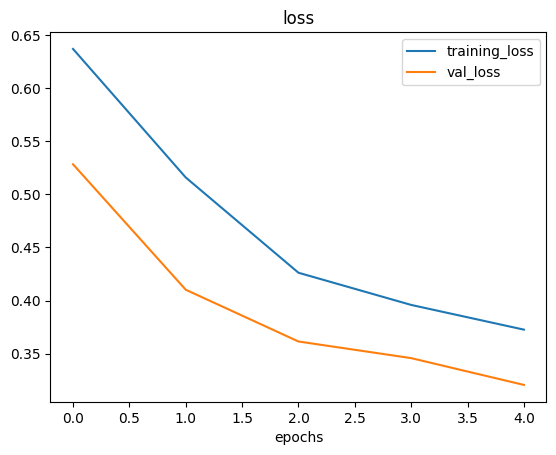

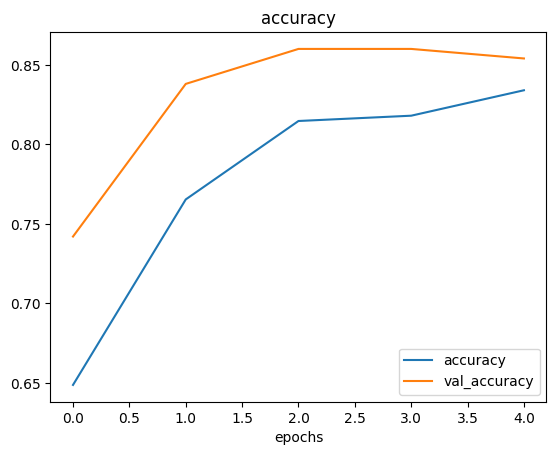

In [ ]:
# plot the model
plot_loss_curves(history_5)

when the accuracy curves or the loss curves are moving seprate from eachother the model is overfitting ... as you see in the upper plots the trajectories are moving with the same slope so the model ain't overfitting


Reducing overfitting is called regularization

In [ ]:
### Finding data augumentation

In [ ]:
# Create IamgeDataGenerator ...
train_datagen_augumentation = ImageDataGenerator(rescale = 1./255,
                                                 rotation_range=0.2, # how much do you want to rotate the image?
                                                 shear_range = 0.2, # How much do you want to shear the image?
                                                 zoom_range = 0.2, # zoom in random range
                                                 width_shift_range =0.2, # move the image around in X axis
                                                 height_shift_range=0.2,# move the image around in y axis
                                                 horizontal_flip = True) # # Flips the image

# Create ImageDatagenerator without data augumentation
train_datagen = ImageDataGenerator(rescale= 1./255)
test_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
images, labels = train_data.next()

augumented_images, augumented_labels = train_data_augumented.next()

showing image number: 6


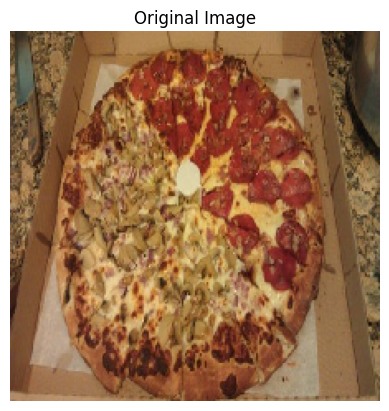

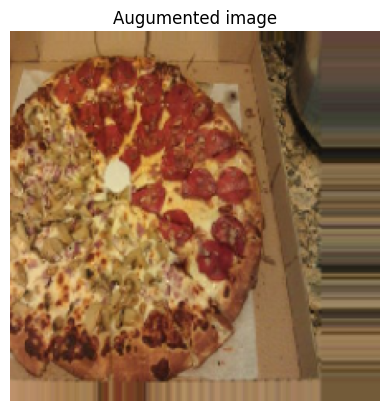

In [ ]:
# Show Orginal image and augumented imagees
import random
random_number = random.randint(0, 32)
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augumented_images[random_number])
plt.title(f"Augumented image")
plt.axis(False);

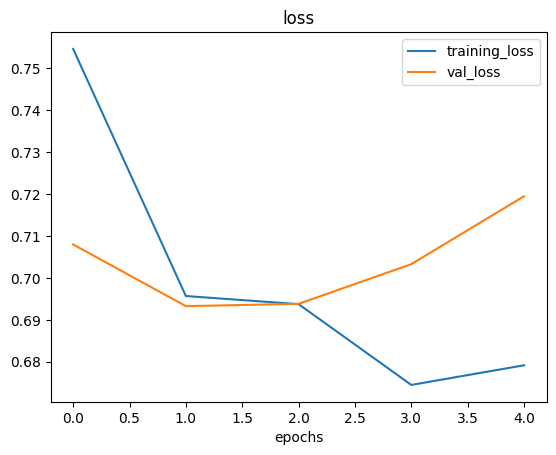

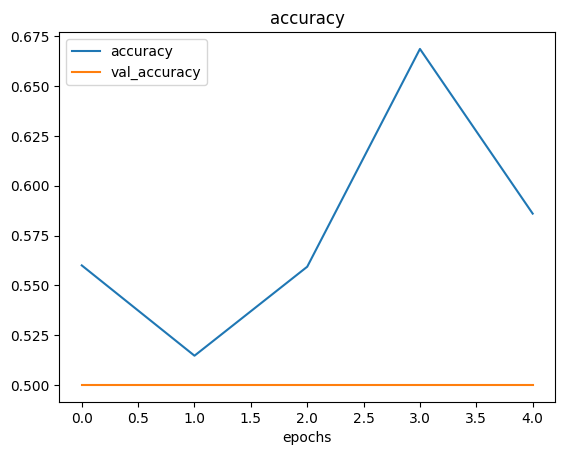

In [ ]:
plot_loss_curves(history_6)

In [ ]:
import time
start = time.time()
train_dir = "/content/pizza_steak/train"
valid_dir = "/content/pizza_steak/test"

from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Generating the data sequence
train_datagen_augmented = ImageDataGenerator(rescale = 1./255,
                                              rotation_range = 0.2,
                                              width_shift_range= 0.2,
                                              height_shift_range=  0.2,
                                              horizontal_flip = True,
                                              shear_range = 0.2,
                                              zoom_range= 0.2
                                              )
train_datagen = ImageDataGenerator(rescale =1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)


# Getting the data ready
train_data_augumented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size=32,
    class_mode = "binary")

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size= 32,
    class_mode = "binary")

valid_data = valid_datagen.flow_from_directory(
    valid_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = "binary"
)

# Making the model
# Create a model with augmented training data
model_6 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape =(224, 224, 3)),
    MaxPool2D(2, 2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(2, 2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(2, 2),
    Flatten(),
    Dense(1, activation = "sigmoid")

])

# compile the model
model_6.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augumented,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augumented),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

stop = time.time()
print(stop - start)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 73s 2s/step - loss: 0.6428 - accuracy: 0.6253 - val_loss: 0.4789 - val_accuracy: 0.7840
Epoch 2/5
47/47 [==============================] - 74s 2s/step - loss: 0.4996 - accuracy: 0.7640 - val_loss: 0.3597 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 75s 2s/step - loss: 0.4865 - accuracy: 0.7713 - val_loss: 0.3522 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 76s 2s/step - loss: 0.4648 - accuracy: 0.7907 - val_loss: 0.3282 - val_accuracy: 0.8760
Epoch 5/5
47/47 [==============================] - 75s 2s/step - loss: 0.4587 - accuracy: 0.7960 - val_loss: 0.3102 - val_accuracy: 0.8720
387.337406873703


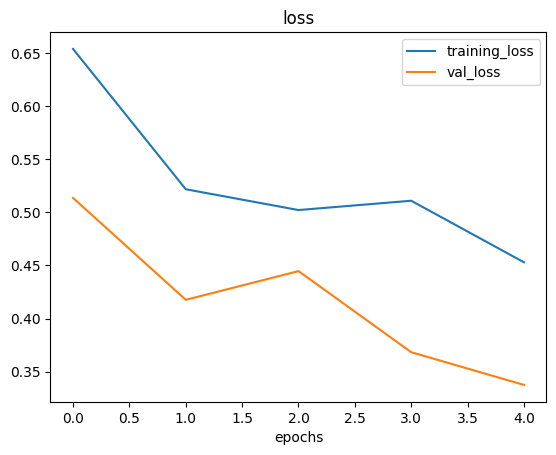

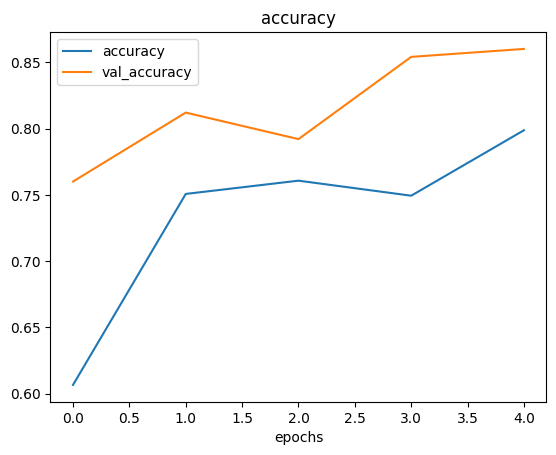

In [ ]:
plot_loss_curves(history_6)

In [ ]:
# This with out shuffle
train_dir = "/content/pizza_steak/train"
valid_dir = "/content/pizza_steak/test"

from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Generating the data sequence
train_datagen_augmented = ImageDataGenerator(rescale = 1./255,
                                              rotation_range = 0.2,
                                              width_shift_range= 0.2,
                                              height_shift_range=  0.2,
                                              horizontal_flip = True,
                                              shear_range = 0.2,
                                              zoom_range= 0.2
                                             )
train_datagen = ImageDataGenerator(rescale =1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)


# Getting the data ready
train_data_augumented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size=32,
    class_mode = "binary",
    shuffle = False)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size= 32,
    class_mode = "binary",
    shuffle = False)

valid_data = valid_datagen.flow_from_directory(
    valid_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = "binary",
    shuffle = False)

# Making the model
# Create a model with augmented training data
model_7 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape =(224, 224, 3)),
    MaxPool2D(2, 2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(2, 2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(2, 2),
    Flatten(),
    Dense(1, activation = "sigmoid")

])

# compile the model
model_7.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augumented,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augumented),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 29s 571ms/step - loss: 0.7053 - accuracy: 0.4033 - val_loss: 0.6918 - val_accuracy: 0.5180
Epoch 2/5
47/47 [==============================] - 20s 424ms/step - loss: 0.6915 - accuracy: 0.5120 - val_loss: 0.6742 - val_accuracy: 0.7360
Epoch 3/5
47/47 [==============================] - 21s 453ms/step - loss: 0.6905 - accuracy: 0.6473 - val_loss: 0.6609 - val_accuracy: 0.7280
Epoch 4/5
47/47 [==============================] - 24s 511ms/step - loss: 0.6632 - accuracy: 0.6160 - val_loss: 0.5789 - val_accuracy: 0.6680
Epoch 5/5
47/47 [==============================] - 21s 448ms/step - loss: 0.6262 - accuracy: 0.6893 - val_loss: 0.5396 - val_accuracy: 0.7120


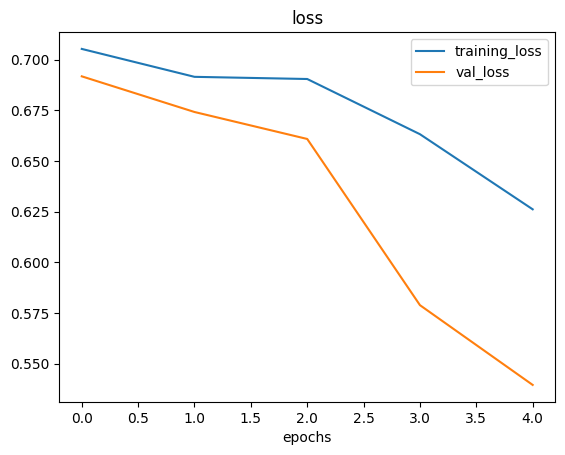

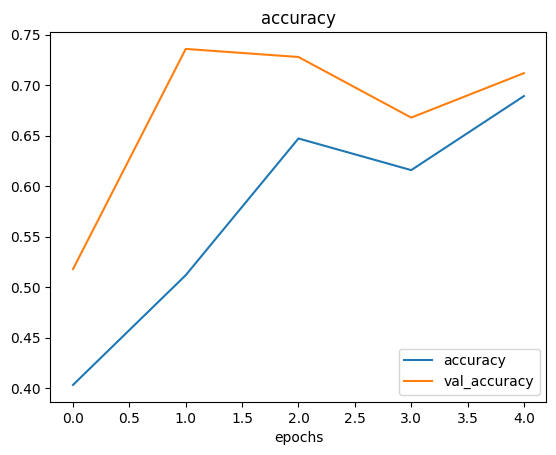

In [ ]:
plot_loss_curves(history_7)

In [ ]:
# Evaluiating model 6
model_6.evaluate(valid_data)

16/16 [==============================] - 3s 174ms/step - loss: 0.3374 - accuracy: 0.8600


[0.33742937445640564, 0.8600000143051147]

In [ ]:
# Make a model using nopn augmented data
model_8 = Sequential([
     Conv2D(10, 3, activation = "relu", input_shape =(224, 224, 3)),
    MaxPool2D(2, 2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(2, 2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(2, 2),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

# Compile the model
model_8.compile(loss=  "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 123ms/step - loss: 0.7020 - accuracy: 0.4247 - val_loss: 0.6891 - val_accuracy: 0.5060
Epoch 2/5
47/47 [==============================] - 7s 141ms/step - loss: 0.6836 - accuracy: 0.5653 - val_loss: 0.6281 - val_accuracy: 0.6640
Epoch 3/5
47/47 [==============================] - 5s 112ms/step - loss: 0.6378 - accuracy: 0.6680 - val_loss: 0.5895 - val_accuracy: 0.7440
Epoch 4/5
47/47 [==============================] - 6s 129ms/step - loss: 0.6050 - accuracy: 0.7033 - val_loss: 0.5602 - val_accuracy: 0.7620
Epoch 5/5
47/47 [==============================] - 5s 113ms/step - loss: 0.5705 - accuracy: 0.6867 - val_loss: 0.5327 - val_accuracy: 0.7980


#######################################################

## Making a prediction with our trained model on our own custom data:

In [ ]:
# Classes We're working with
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


# Multi-class classification

In [ ]:
## 1.Import our data
!wget "https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip"

--2024-04-26 16:27:25--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.18.207, 142.250.153.207, 142.250.145.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.18.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  39.3MB/s    in 13s     

2024-04-26 16:27:38 (37.2 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
import zipfile
dir = "/content/10_food_classes_all_data.zip"
zip_ref = zipfile.ZipFile(dir, "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os

# walkthrough 10 classes of food image data
for dirpath, dirnames, filenames, in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in '10_food_classes_all_data'
There are 10 directories and 0 images in '10_food_classes_all_data/train'
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'
There are 1

In [ ]:
!ls -la 10_food_classes_all_data/

total 16
drwxr-xr-x  4 root root 4096 Apr 26 16:00 .
drwxr-xr-x  1 root root 4096 Apr 26 16:27 ..
drwxr-xr-x 12 root root 4096 Apr 26 16:00 test
drwxr-xr-x 12 root root 4096 Apr 26 16:00 train


In [ ]:
# Setup the train and test directories
train_dir = "/content/10_food_classes_all_data/train/"
valid_dir = "/content/10_food_classes_all_data/test/"

In [ ]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib .Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['2992084.jpg']
image_shape: (512, 512, 3)


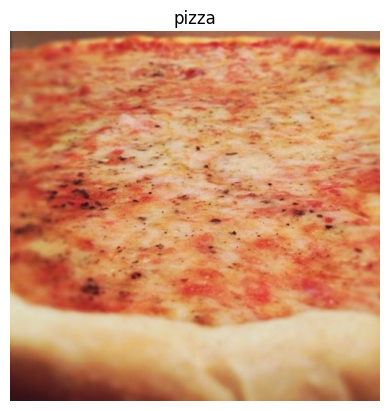

In [ ]:
# Visualize
import random
img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range =0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range = 0.2,
                                   shear_range=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load data in from directories and turn it into batches

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode="categorical"
)

test_data = test_datagen.flow_from_directory(
    valid_dir,
    target_size= (224, 224),
    batch_size= 32,
    class_mode = "categorical"
)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
# 3. Create a model
model_9 = Sequential([
    Conv2D(10, 3, input_shape =(224, 224, 3)),
    Activation(activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(2),
    Conv2D(10, 3, activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(10, activation ="softmax") # Changed to have 10 output neurone and use softmax activaton function
])

In [ ]:
# Compile the model
model_9.compile(loss = "categorical_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

In [ ]:
# Fit the model
model_9.fit(train_data,
            epochs=5,
            steps_per_epoch =len(train_data),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 650s 3s/step - loss: 2.2340 - accuracy: 0.1615 - val_loss: 2.1198 - val_accuracy: 0.2172
Epoch 2/5
235/235 [==============================] - 632s 3s/step - loss: 2.1349 - accuracy: 0.2241 - val_loss: 1.9736 - val_accuracy: 0.2852
Epoch 3/5
235/235 [==============================] - 601s 3s/step - loss: 2.0601 - accuracy: 0.2640 - val_loss: 1.9054 - val_accuracy: 0.3340
Epoch 4/5
235/235 [==============================] - 605s 3s/step - loss: 1.9840 - accuracy: 0.3011 - val_loss: 1.8633 - val_accuracy: 0.3288
Epoch 5/5
235/235 [==============================] - 635s 3s/step - loss: 1.9485 - accuracy: 0.3195 - val_loss: 1.7614 - val_accuracy: 0.3992


In [ ]:
plot_loss_curves()

# DEEP LEARNING WITH PYTHON SEASON 8

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [ ]:
from tensorflow import keras
from keras import layers
inputs =  keras.Input(shape = (28, 28, 1))
x = layers.Conv2D(filters = (32), kernel_size = 3, activation = "relu") (inputs)
x = layers.MaxPool2D(pool_size = 2) (x)
x = layers.Conv2D(filters = (64), kernel_size = 3, activation = "relu") (x)
x = layers.MaxPool2D(pool_size = 2) (x)
x = layers.Conv2D(filters = 128, kernel_size = 2)(x)
x = layers.Flatten() (x)
outputs = layers.Dense(10, activation = "softmax")(x)
model  = keras.Model(inputs = inputs, outputs = outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         32896 

In [ ]:
from keras.datasets import mnist

In [ ]:
(train_image, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_image = train_image.reshape((60000, 28, 28, 1))
train_image = train_image/ 255.
test_image =  test_images.reshape((10000, 28, 28, 1))
test_image = test_image/ 255.

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"]
              )

In [ ]:
model.fit(train_image, train_labels,
          epochs = 5,
          batch_size = 64)

Epoch 1/5
938/938 [==============================] - 8s 8ms/step - loss: 0.1614 - accuracy: 0.9512
Epoch 2/5
938/938 [==============================] - 8s 8ms/step - loss: 0.0567 - accuracy: 0.9822
Epoch 3/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0442 - accuracy: 0.9861
Epoch 4/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0353 - accuracy: 0.9884
Epoch 5/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0301 - accuracy: 0.9904


In [ ]:
model.evaluate(test_image, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0342 - accuracy: 0.9895


[0.03420788422226906, 0.9894999861717224]

In [ ]:
!kaggle competitions download -c doegs-vs-cats

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!wget "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip"

--2024-04-28 14:25:11--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.222.202.7, 2600:1408:ec00:88e::317f, 2600:1408:ec00:889::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.222.202.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M  95.3MB/s    in 5.8s    

2024-04-28 14:25:17 (135 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/kagglecatsanddogs_5340.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os

# walkthrough 10 classes of food image data
for dirpath, dirnames, filenames, in os.walk("/content/PetImages"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in '/content/PetImages'
There are 0 directories and 12501 images in '/content/PetImages/Dog'
There are 0 directories and 12501 images in '/content/PetImages/Cat'


## WE Only want 1000, image of each animal:

In [ ]:
!mkdir cats_dogs_small

mkdir: cannot create directory ‘cats_dogs_small’: File exists


In [ ]:
import os, shutil, pathlib
original_dir = pathlib.Path("/content/PetImages")
new_base_dir = pathlib.Path("/content/cats_dogs_small")

In [ ]:
def make_subset(subset_name, start_index, end_index):
  for category in ("Cat", "Dog"):
    dir = new_base_dir / subset_name / f"{category}/"
    os.makedirs(dir)
    fnames = [f"{category}/{i}.jpg"
    for i in range(start_index, end_index)]
    for fname in fnames:
      shutil.copyfile(src= original_dir / fname, dst = dir /fname)

In [ ]:
import os
import shutil
import pathlib

original_dir = pathlib.Path("/content/PetImages")
new_base_dir = pathlib.Path("/content/cats_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("Cat", "Dog"):
        # Construct the destination directory path
        dir_path = new_base_dir / subset_name / category
        os.makedirs(dir_path, exist_ok=True)  # Create directory if not exists
        # Generate filenames for the current category within the specified range
        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            # Construct source and destination file paths
            src_path = original_dir / category / fname
            dst_path = dir_path / fname
            # Copy the file from the original directory to the destination directory
            shutil.copyfile(src=src_path, dst=dst_path)

# Create subsets for training, validation, and testing
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)


In [ ]:
# Make the model
from tensorflow.keras import layers

In [ ]:
# Get the data ready then rescale and ...

train_dir = "/content/cats_dogs_small/train"
validation_dir = "/content/cats_dogs_small/validation"
test_dir = "/content/cats_dogs_small/test"

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
from keras.utils import image_dataset_from_directory

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = (180, 180),
    batch_size = 32,
    class_mode ="binary"
)

validation_data = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (180, 180),
    batch_size = 32,
    class_mode ="binary"
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size = (180, 180),
    batch_size = 32,
    class_mode ="binary"
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, MaxPool2D, Conv2D, Flatten
from keras.optimizers import Adam, RMSprop

In [ ]:
# Global variables
IMAGE_WIDTH = 180
IMAGE_HEIGHT = 180
IMAGE_CHANNELS = 3

import tensorflow as tf
# Set a random seed
tf.random.set_seed(42)

# Make a model
model_1 = Sequential([
    Conv2D(filters = 32,
           kernel_size = 3,
           activation = "relu",
           input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)),
    MaxPool2D(2),
    Conv2D(64, 3, activation = "relu"),
    MaxPool2D(2),
    Conv2D(128, 3, activation = "relu"),
    MaxPool2D(2),
    Conv2D(256, 3, activation = "relu"),
    MaxPool2D(2),
    Conv2D(256, 3, activation = "relu"),
    Flatten(),
    Dense(1, activation = "sigmoid")
    ])

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 20, 20, 128)       0

In [ ]:
callbacks = [tf.keras.callbacks.ModelCheckpoint(
    filepath= "convent_from_scratch.keras",
    save_best_only = True,
    monitor = "val_loss")
]

class myClass(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, log={}):
        if log.get("accuracy") >= 0.9:
            print("Target reached")
            self.model.stop_training = True

callback_1 = myClass()
